In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    # plt.xlabel("$x_1$", fontsize=14)
    # plt.ylabel("$x_2$", fontsize=14, rotation=0)

from sklearn.datasets import make_blobs, make_circles, make_moons

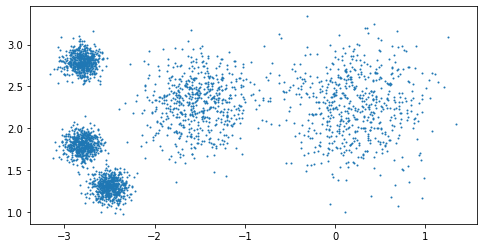

In [85]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.5,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=3000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(8, 4))
plot_clusters(X)

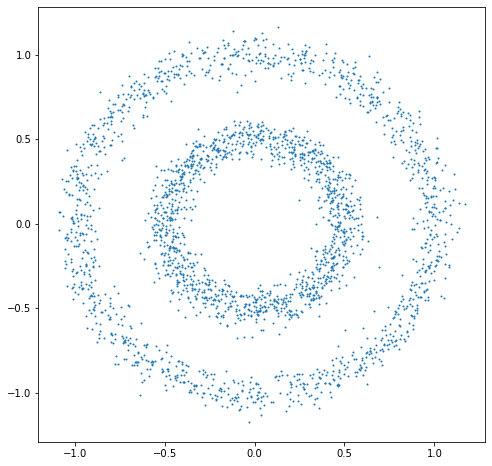

In [59]:
X, y = make_circles(2500, factor=0.5, noise=0.06)
plt.figure(figsize=(8, 8))
plot_clusters(X)

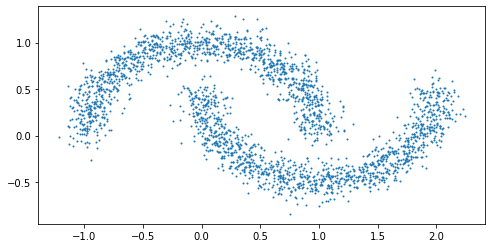

In [79]:
X, y = make_moons(2500, noise=0.1)
plt.figure(figsize=(8, 4))
plot_clusters(X)

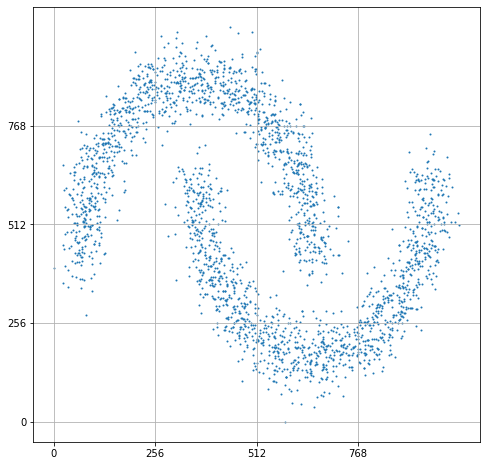

In [80]:
# масштабируем данные:
from sklearn import preprocessing
SIZE = 1024
scaler = preprocessing.MinMaxScaler(feature_range=(0, SIZE))
X_scaled = scaler.fit_transform(X)

DIMENSION = X_scaled.shape[1]  # размерность пространства признаков

plt.figure(figsize=(8, 8))
plt.grid()
plt.xticks(np.arange(0,1024,256))
plt.yticks(np.arange(0,1024,256))
plot_clusters(X_scaled)

{1: <cluster.Cluster object at 0x000002C329420BE0>, 2: <cluster.Cluster object at 0x000002C329420D00>}


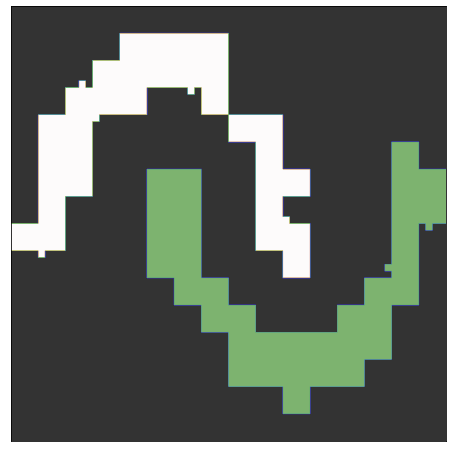

In [81]:
from cluster import *

# параметры кластеризации:
DENOMINATOR = 4                   # на сколько частей делится ребро клетки
ADJACENCY = 0.1
HOMOGENEITY = 6.5
DENSITY = 2

CONSTANTS = {
            "SIZE" : SIZE,
            "DIMENSION" : DIMENSION,
            "DENOMINATOR" : DENOMINATOR,
            "ADJACENCY" : ADJACENCY,
            "HOMOGENEITY" : HOMOGENEITY,
            "DENSITY" : DENSITY,
            }

from copy import deepcopy

clusters = clustering(X_scaled, CONSTANTS)
print(clusters)

showClusterCells(clusters, 5, CONSTANTS, True)